# 00a Diffusion Curvature, Explained

In [ ]:
#| include: false
import numpy as np

One proxy for the pointwise curvature on a graph is the laziness of random walks emanating from each point. Intuitively, in spaces of positive curvature, the neighbors of neighboring points have more neighbors in common; stepping randomly between them will thus return to the starting point more often than in regions of lower curvature.

This can be measured by a neighborhood volume over t-step diffusion values.

For each point, we diffuse a point mass for $t$ steps, like this:

In [ ]:
#| echo:false
from diffusion_curvature.datasets import torus
from diffusion_curvature.core import DiffusionMatrix, plot_3d

In [ ]:
#| echo:false
X, ks = torus(n = 5000-3, use_guide_points=True)
P = DiffusionMatrix(X, kernel_type='adaptive',k=10)

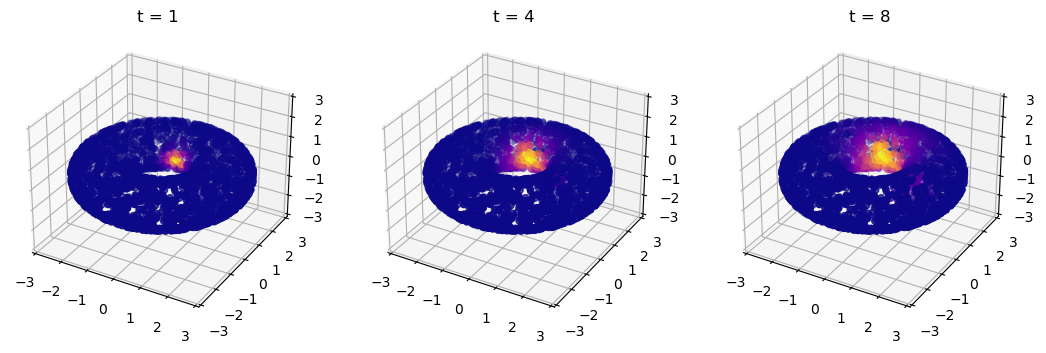

In [ ]:
#| echo:false
D1 = P[1]
P2 = np.linalg.matrix_power(P,4)
P3 = np.linalg.matrix_power(P,8)
D2 = P2[1]
D3 = P3[1]
import matplotlib.pyplot as plt
lim = 3
cmap = "plasma"

fig = plt.figure(figsize=(13,5))

ax = fig.add_subplot(131,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im = ax.scatter(X[:,0],X[:,1],X[:,2],c=D1,cmap=cmap)
ax.set_title("t = 1")
# if colorbar: fig.colorbar(im, ax=ax)

ax1 = fig.add_subplot(132,projection='3d')
ax1.axes.set_xlim3d(left=-lim, right=lim)
ax1.axes.set_ylim3d(bottom=-lim, top=lim)
ax1.axes.set_zlim3d(bottom=-lim, top=lim)
im = ax1.scatter(X[:,0],X[:,1],X[:,2],c=D2,cmap=cmap)
ax1.set_title("t = 4")

ax2 = fig.add_subplot(133,projection='3d')
ax2.axes.set_xlim3d(left=-lim, right=lim)
ax2.axes.set_ylim3d(bottom=-lim, top=lim)
ax2.axes.set_zlim3d(bottom=-lim, top=lim)
im = ax2.scatter(X[:,0],X[:,1],X[:,2],c=D3,cmap=cmap)
ax2.set_title("t = 8")

# fig.suptitle("t-step Diffusion from Hyperbolic Region")
plt.show()

This point above, in the inside of the torus, lives within a region of negative curvature. As such, the geodesic rays emanating from this point diverge rapidly. The diffusion becomes very quickly diffuse.

By contrast, a region on the positively-curved front of the torus has more restricted diffusion. The geodesic rays emanating from this point curve back in on themselves. The diffusion takes longer to spread out.

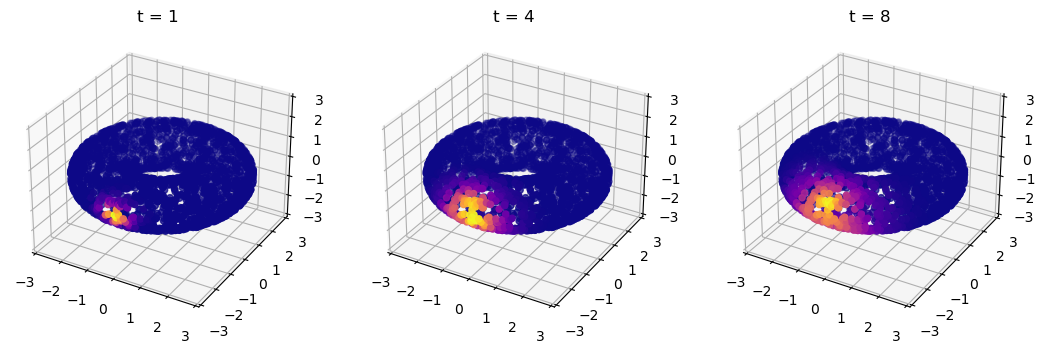

In [ ]:
#| echo:false
D1 = P[0]
P2 = np.linalg.matrix_power(P,4)
P3 = np.linalg.matrix_power(P,8)
D2 = P2[0]
D3 = P3[0]
import matplotlib.pyplot as plt
lim = 3
cmap = "plasma"

fig = plt.figure(figsize=(13,5))

ax = fig.add_subplot(131,projection='3d')
ax.axes.set_xlim3d(left=-lim, right=lim)
ax.axes.set_ylim3d(bottom=-lim, top=lim)
ax.axes.set_zlim3d(bottom=-lim, top=lim)
im = ax.scatter(X[:,0],X[:,1],X[:,2],c=D1,cmap=cmap)
ax.set_title("t = 1")
# if colorbar: fig.colorbar(im, ax=ax)

ax1 = fig.add_subplot(132,projection='3d')
ax1.axes.set_xlim3d(left=-lim, right=lim)
ax1.axes.set_ylim3d(bottom=-lim, top=lim)
ax1.axes.set_zlim3d(bottom=-lim, top=lim)
im = ax1.scatter(X[:,0],X[:,1],X[:,2],c=D2,cmap=cmap)
ax1.set_title("t = 4")

ax2 = fig.add_subplot(133,projection='3d')
ax2.axes.set_xlim3d(left=-lim, right=lim)
ax2.axes.set_ylim3d(bottom=-lim, top=lim)
ax2.axes.set_zlim3d(bottom=-lim, top=lim)
im = ax2.scatter(X[:,0],X[:,1],X[:,2],c=D3,cmap=cmap)
ax2.set_title("t = 8")

# fig.suptitle("t-step Diffusion from Spherical Region")
plt.show()

This motivates the *laziness* of diffusion -- how long it takes to spread across the manifold -- as a curvature measurement.

We can estimate the laziness of the diffusion by measuring the amount of "mass" which remains within the k-nearest neighbors, i.e. the probability that a random walk will land within the k-neighborhood.

In [ ]:
thresholds = np.partition(P,-20)[:,-20]
P_thresholded = (P >= thresholds[:,None]).astype(int)

In [ ]:
P_thresholded[1].nonzero()

(array([   1,  162,  167,  382,  408,  430,  623,  884,  886,  899,  909,
        1242, 1246, 1340, 1442, 1684, 1698, 2066, 2151, 2166]),)

In [ ]:
nns = P_thresholded[1].nonzero()[0]

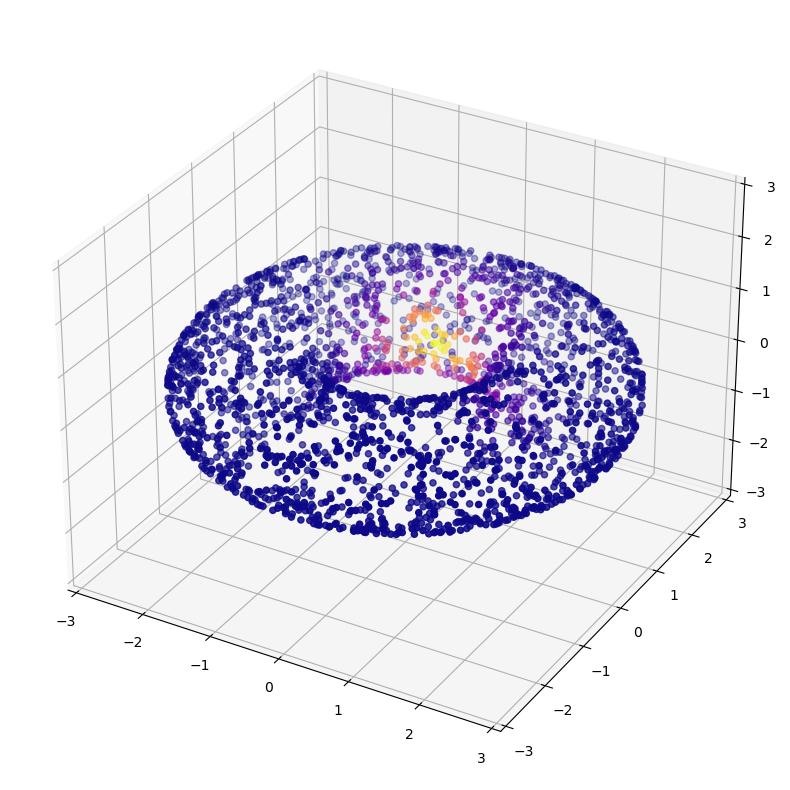

In [ ]:
P2 = np.linalg.matrix_power(P,6)
colors = P2[1]
# colors[nns] = P2[1][1]
plot_3d(X,colors)

The diffusion curvature can be formulated as a graph volume comparison weighted by diffusion probabilities, in which we consider the summed diffusion probabilities within the k neighborhood as the volume of a ball in this region. In analog to the Gromov Bishop volume comparison theorem, comparing these volumes across different regions of the graph yields indicators of relative curvature.